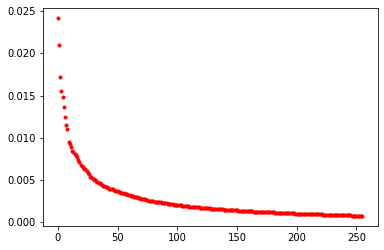

In [6]:
import sys
sys.path.append("..")
import os

import lauetools.LaueTools.IOimagefile as IOimage

import matplotlib.pyplot as plt
import numpy as np
from scipy import fft

#from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn import metrics


def reduce(im, sx, sy, lp, hp):
    SX, SY = im.shape
    im_ = im.reshape(sx, SX // sx, sy,SY // sy).mean(-1).mean(1)
    #ss=cv2.dct(im_)
    ss=fft.dctn(im_)
    ss[:lp, :] = 0.
    ss[:, :lp] = 0.
    ss[hp:, :] = 0.
    ss[:, hp:] = 0.
    #return cv2.idct(ss), ss[lp: hp, lp: hp].ravel()
    return fft.idctn(ss), ss[lp: hp, lp: hp].ravel()

features=np.load('features4096.npy')

features=features.reshape((64*146,4096))

from sklearn.decomposition import PCA

n_pca=256
pca = PCA(n_components=n_pca, svd_solver='randomized')

pca_features=pca.fit_transform(features)#components_

plt.plot(np.arange(n_pca), pca.explained_variance_ratio_,'r.')

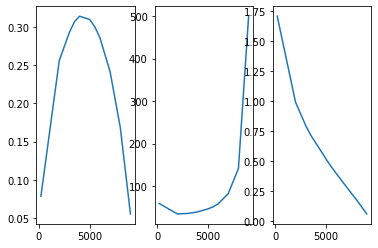

In [15]:
nums=[200,2000,3000,3500,4000,5000,5500,6000,7000,8000,9000]

sil=[]
cal_har=[]
dav_bou=[]

for i in range(len(nums)):
    labels=np.load("label%i.npy"%nums[i])
    sil.append(metrics.silhouette_score(pca_features, labels))#, metric='euclidean'))
    cal_har.append(metrics.calinski_harabasz_score(pca_features, labels))#, metric='euclidean'))
    dav_bou.append(metrics.davies_bouldin_score(pca_features, labels))#, metric='euclidean'))
plt.subplot(1,3,1)
plt.plot(nums,sil)

plt.subplot(1,3,2)
plt.plot(nums,cal_har)

plt.subplot(1,3,3)
plt.plot(nums,dav_bou)

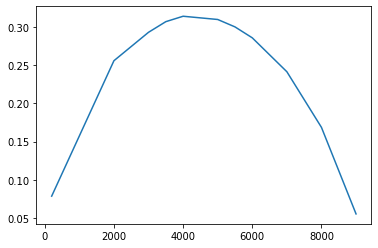

In [11]:
plt.plot(nums,sil)

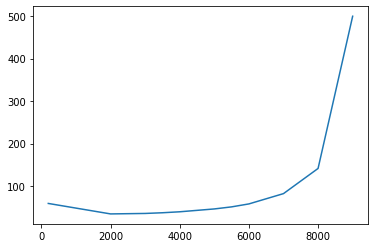

In [12]:
plt.plot(nums,cal_har)

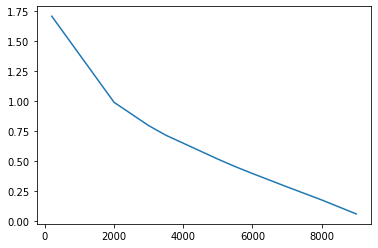

In [13]:
plt.plot(nums,dav_bou)